In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    brier_score_loss,
)

In [3]:
data = pd.read_csv("S05-hw-dataset.csv")

# EDA

In [4]:
data.head(10)

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1
5,6,63,71006,1,712,0.541594,3,0,0,0,14162,372,0.100423,12,0,13,0
6,7,25,37840,25,691,0.032334,1,12,0,0,56999,973,0.432156,12,2,1,0
7,8,55,35993,22,662,0.631521,0,0,0,1,5267,462,0.096401,6,4,2,0
8,9,30,34321,36,687,0.620856,0,7,1,1,20995,3650,0.632998,17,1,1,1
9,10,25,25809,23,601,0.254544,5,0,0,1,38464,3379,0.367238,10,3,0,0


In [5]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

все данные числовые

In [6]:
len(data.columns)

17

In [7]:
print(data.describe())
data.describe().to_csv("statistic.csv")

         client_id          age         income  years_employed  credit_score  \
count  3000.000000  3000.000000    3000.000000     3000.000000   3000.000000   
mean   1500.500000    45.059667   69658.992000       19.577667    649.285333   
std     866.169729    14.192883   24742.235182       11.381497     69.955852   
min       1.000000    21.000000   15000.000000        0.000000    402.000000   
25%     750.750000    33.000000   52641.750000       10.000000    604.000000   
50%    1500.500000    45.000000   69784.500000       20.000000    647.000000   
75%    2250.250000    57.000000   85874.250000       29.000000    697.000000   
max    3000.000000    69.000000  156351.000000       39.000000    850.000000   

       debt_to_income  num_credit_cards  num_late_payments  has_mortgage  \
count     3000.000000       3000.000000        3000.000000   3000.000000   
mean         0.284065          3.494667           6.869333      0.495000   
std          0.161112          2.289917           4

In [8]:
data.default.value_counts(normalize=True) # распределение целевого признака default

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

Всего в датасете 3000 объектов (записей) и 16 признаков (не включая целевую переменную). Явных анамалий в данных не выявлено. Распределение таргета следующее 41% дефолотов и 58% не дефолтов. 

# Разбиение данных

In [9]:
X = data.drop(columns=['default','client_id'])
y = data["default"]
target_names = ["default", "no default"]

In [10]:
RANDOM_STATE = 42

In [11]:
# отделяем тестовую выборку (например, 20% данных)
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,          # важно для классификации: сохраняем долю классов
    random_state=RANDOM_STATE,
)

In [12]:
# делим оставшиеся данные на train и validation (например, 60/20)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,      # 0.25 от X_temp = 0.25 * 0.8 = 0.2 от исходных
    stratify=y_temp,
    random_state=RANDOM_STATE,
)

In [13]:
print("Размеры выборок:")
print("  train:", X_train.shape)
print("  val:  ", X_val.shape)
print("  test: ", X_test.shape)

print("\nРаспределение классов (train):")
print(y_train.value_counts(normalize=True))

print("\nРаспределение классов (val):")
print(y_val.value_counts(normalize=True))

print("\nРаспределение классов (test):")
print(y_test.value_counts(normalize=True))

Размеры выборок:
  train: (1800, 15)
  val:   (600, 15)
  test:  (600, 15)

Распределение классов (train):
default
0    0.589444
1    0.410556
Name: proportion, dtype: float64

Распределение классов (val):
default
0    0.59
1    0.41
Name: proportion, dtype: float64

Распределение классов (test):
default
0    0.59
1    0.41
Name: proportion, dtype: float64


# Бейзлайн-модель

In [14]:
baseline = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)

# Обучаем только на train
baseline.fit(X_train, y_train)

# Оцениваем на validation
y_val_pred_baseline = baseline.predict(X_val)
y_val_proba_baseline = baseline.predict_proba(X_val)[:, 1]


data = {
    "Model":"Baseline",
    "Accuracy": accuracy_score(y_val, y_val_pred_baseline),
    "Precision": precision_score(y_val, y_val_pred_baseline, zero_division=0),
    "Recall": recall_score(y_val, y_val_pred_baseline, zero_division=0),
    "F1-score": f1_score(y_val, y_val_pred_baseline, zero_division=0)
}

try:
    data["ROC-AUC"] = roc_auc_score(y_val, y_val_proba_baseline)
except ValueError as e:
    print("Не удалось посчитать ROC-AUC для бейзлайна:", e)
    data["ROC-AUC"] = "-"

report_dummy = pd.DataFrame(data, index = [0])

In [15]:
report_dummy

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Baseline,0.59,0.0,0.0,0.0,0.5


Нулевые значения метрика (Precision, Recall, F1-Score) можно объяснить тем, что TP = 0 (т.е. правильных угаданных дефолтов, что логично, ведь глупый классификатор всегда пишет, что дефолта нет)

Бейзлайн даёт нижнюю планку качества, что позволяет оценивать качество обучения моделей хоть с чем-то. Модель, которая хуже бейзлайна не имеет смысла - это ужасная модель.

# Логистическая регрессия

In [16]:
log_reg_pipeline = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "logreg",
            LogisticRegression(
                C=1.0,              # сила регуляризации (чем меньше C, тем сильнее регуляризация)
                solver="liblinear", # надёжный солвер для маленьких датасетов
                random_state=RANDOM_STATE,
            ),
        ),
    ]
)
# Обучаем pipeline на train
log_reg_pipeline.fit(X_train, y_train)
# Предсказываем на validation
y_val_pred = log_reg_pipeline.predict(X_val)
y_val_proba = log_reg_pipeline.predict_proba(X_val)[:, 1]

data = {
    "Model": "logistic_first",
    "Accuracy": accuracy_score(y_val, y_val_pred),
    "Precision": precision_score(y_val, y_val_pred, zero_division=0),
    "Recall": recall_score(y_val, y_val_pred, zero_division=0),
    "F1-score": f1_score(y_val, y_val_pred, zero_division=0),
    "ROC-AUC": roc_auc_score(y_val, y_val_proba)
}

report_logistic = pd.DataFrame(data, index=[0])

In [17]:
report_logistic

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,logistic_first,0.816667,0.850515,0.670732,0.75,0.874638


In [18]:
print("\nПодробный отчёт по классам (classification_report):")
print(classification_report(y_val, y_val_pred, target_names=target_names))


Подробный отчёт по классам (classification_report):
              precision    recall  f1-score   support

     default       0.80      0.92      0.86       354
  no default       0.85      0.67      0.75       246

    accuracy                           0.82       600
   macro avg       0.83      0.79      0.80       600
weighted avg       0.82      0.82      0.81       600



# Подбор параметра регуляризации

In [19]:
param_grid = {
    "logreg__C": [0.01,0.05, 0.1, 0.15, 1.0, 5.0, 10.0, 100.0],
}

# GridSearchCV будет:
# - внутри делать кросс-валидацию по train
# - выбирать лучший C по заданной метрике (например, ROC-AUC).
grid_search = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    scoring="roc_auc",    # можно поменять на f1, recall и т.д.
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший ROC-AUC (по CV):", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Лучшие параметры: {'logreg__C': 0.1}
Лучший ROC-AUC (по CV): 0.8535885101695057


# Делаем окончательные выводы о логистической регрессии

In [20]:
# Берём лучшую найденную модель
best_model = grid_search.best_estimator_

# Оцениваем на validation
y_val_pred_best = best_model.predict(X_val)
y_val_proba_best = best_model.predict_proba(X_val)[:, 1]

data_best = {
    "Model": "logistic_best",
    "Accuracy": accuracy_score(y_val, y_val_pred_best),
    "Precision": precision_score(y_val, y_val_pred_best, zero_division=0),
    "Recall": recall_score(y_val, y_val_pred_best, zero_division=0),
    "F1-score": f1_score(y_val, y_val_pred_best, zero_division=0),
    "ROC-AUC": roc_auc_score(y_val, y_val_proba_best)
}

report_logistic_val_best = pd.DataFrame(data_best, index=[0])

# Оцениваем на test
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

data_test = {
    "Model": "logistic_test",
    "Accuracy": accuracy_score(y_test, y_test_pred),
    "Precision": precision_score(y_test, y_test_pred, zero_division=0),
    "Recall": recall_score(y_test, y_test_pred, zero_division=0),
    "F1-score": f1_score(y_test, y_test_pred, zero_division=0),
    "ROC-AUC": roc_auc_score(y_test, y_test_proba)
}

report_logistic_test = pd.DataFrame(data_test, index=[0])

report_logistic_test # метрики лучшей модели
     


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,logistic_test,0.805,0.805687,0.691057,0.743982,0.87496


In [21]:
print("Classification report (test):")
print(classification_report(y_test, y_test_pred, target_names=target_names))

Classification report (test):
              precision    recall  f1-score   support

     default       0.80      0.88      0.84       354
  no default       0.81      0.69      0.74       246

    accuracy                           0.81       600
   macro avg       0.81      0.79      0.79       600
weighted avg       0.81      0.81      0.80       600



## Построение и сохранение AUC графика

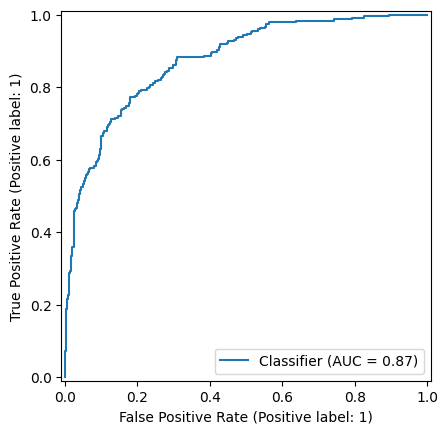

In [22]:
display = RocCurveDisplay.from_predictions(y_test, y_test_proba)

display.figure_.savefig("figures/roc_curve.png")

## Выводы

In [23]:
result = pd.concat([report_logistic_test, report_dummy], ignore_index=True)
result # таблица сравнения конечной модели и бейзлайна

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,logistic_test,0.805,0.805687,0.691057,0.743982,0.87496
1,Baseline,0.590,0.000000,0.000000,0.000000,0.50000


In [24]:
result_val = pd.concat([report_logistic, report_logistic_val_best], ignore_index=True)
result_val # таблица сравнения качества первой модели и модели с лучшим параметром решуляризации на валдационном датасете

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,logistic_first,0.816667,0.850515,0.670732,0.750000,0.874638
1,logistic_best,0.815000,0.849741,0.666667,0.747153,0.874684


Бейзлайн хуже по качеству. Данный вывод можно сделать по ряду метрик: по метрике Accuracy видно, что рост качества модели по сравнению с бейзлайном на 0.215. Метрики Recall, Precision у бейзлайна вообще равны нулю, а следственно и f1-score (в отличии от модели). По ROC-AUC модель логистической регрессии тоже лучше на 0.375.

Перебор параметра C не дал результата, что видно по сводной таблице, где есть незначительное падение качества (на уровне погрешности) модели с лучшим параметром. Можно сделать вывод, что значение регуляризации равное 1 даёт такой-же результат как и 0.1.

Исходя из значений метрик на тестовом датасете можно уверенно утверждать, что модель с лучшими параметрами (best_model) намного лучше справляется с задачей бинарной классификации чем бейзлайн. Поэтому разумнее использовать модель best_model для данной задачи предсказания дефолта.